# ASDA - Assignment 09 (Model Simplification/Reduction) - Group 5

## 1) Happiness Score Dataset

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing the Dataset

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Happiness2018.csv")
df.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [6]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Correlation

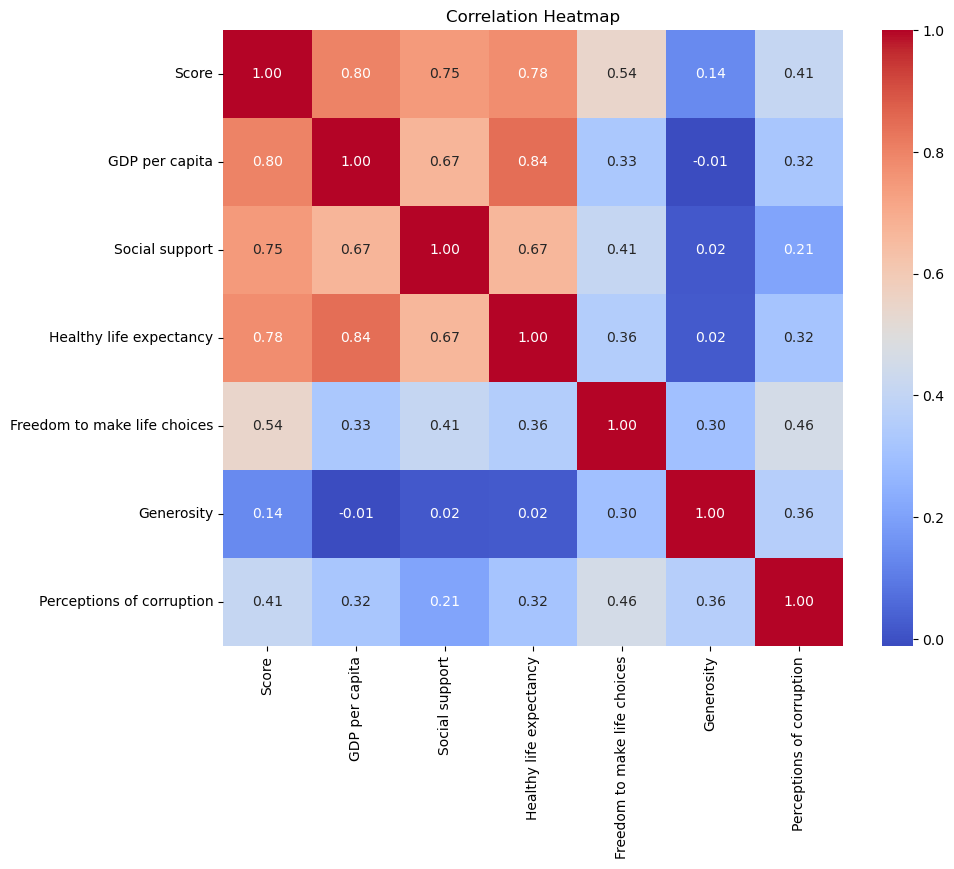

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['Overall rank', 'Country or region']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

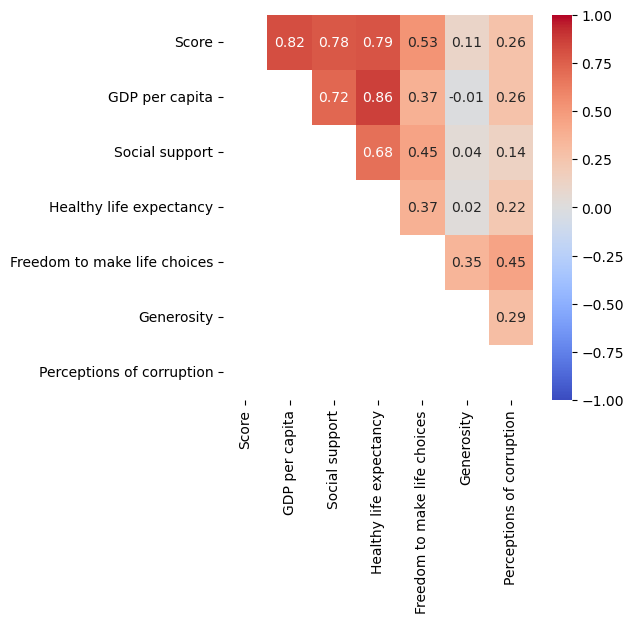

In [8]:
happy_data = df.iloc[:, 2:]
plt.figure(figsize = (5,5))
sns.heatmap(round(happy_data.corr(method = 'spearman'),2), mask = np.tril(happy_data.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

### Visualization

array([[<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>]],
      dtype=object)

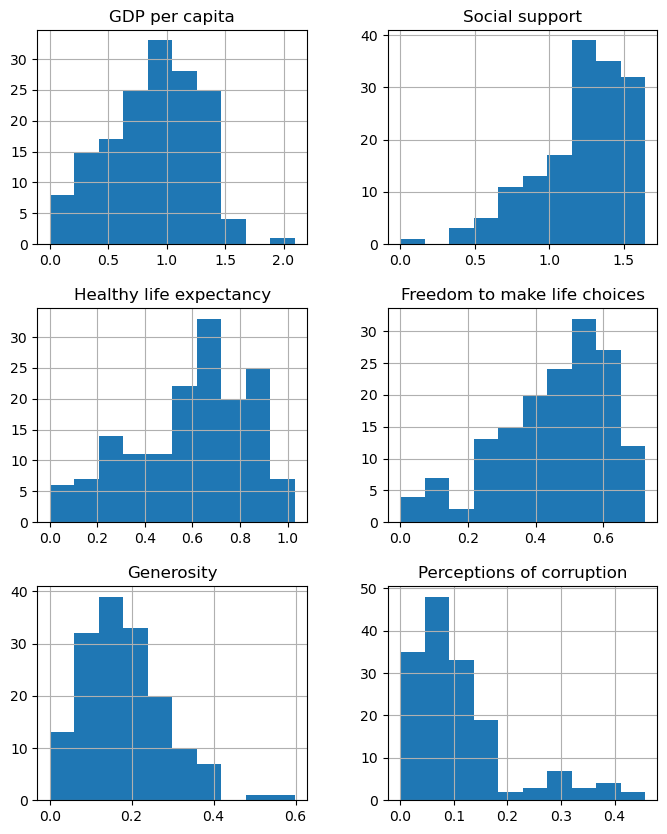

In [9]:
happy_data_2 = df.iloc[:, 3:]
happy_data_2.hist(figsize=(8,10))

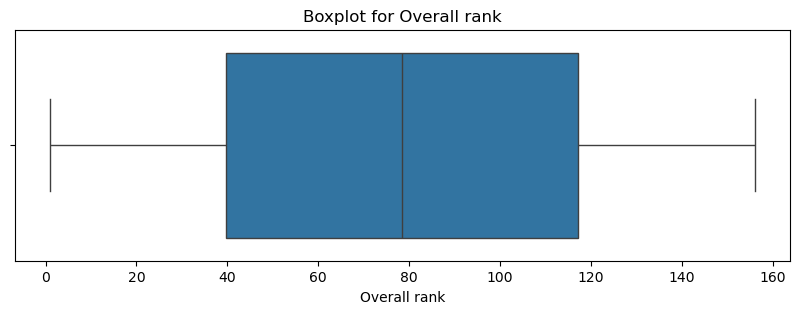

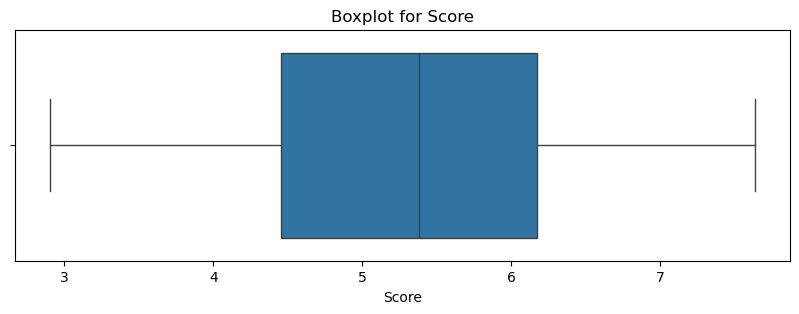

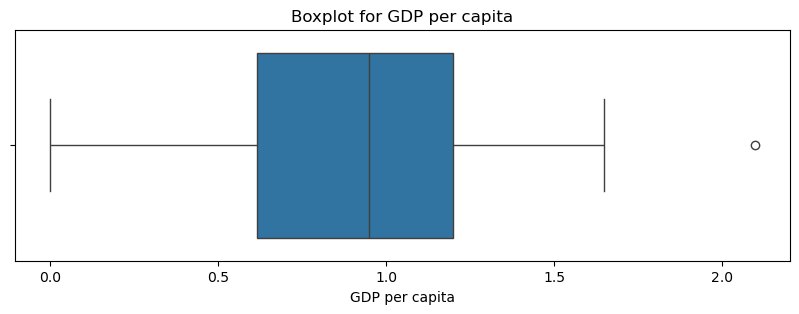

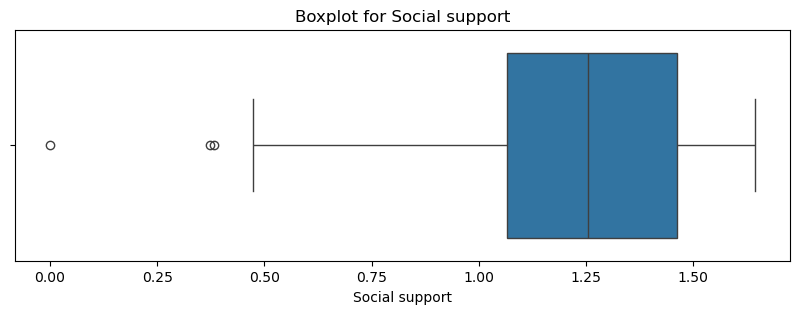

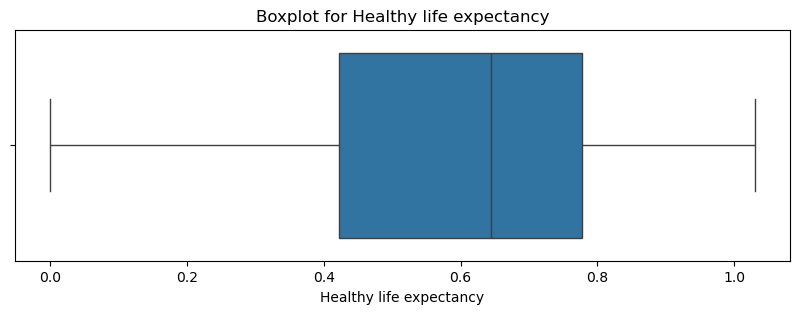

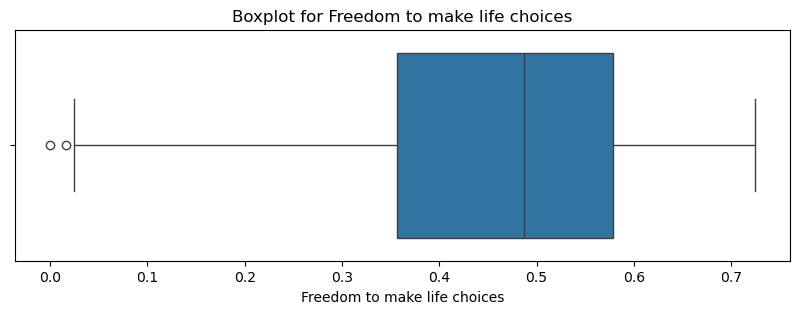

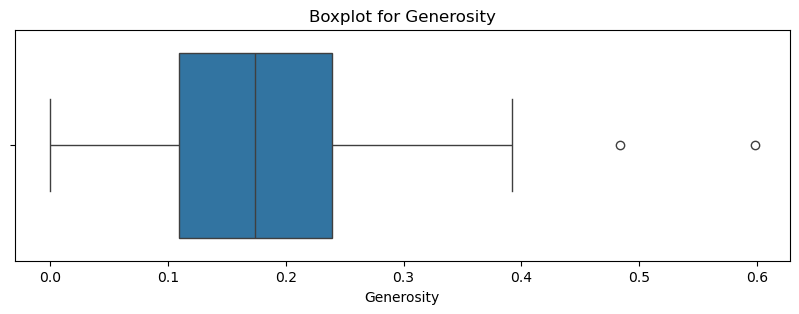

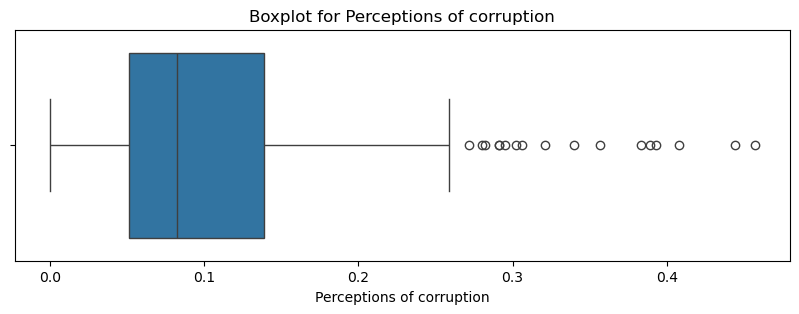

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 3))
    #plt.boxplot(df[column].dropna(), vert=False)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25036\2349974081.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=color_palette)


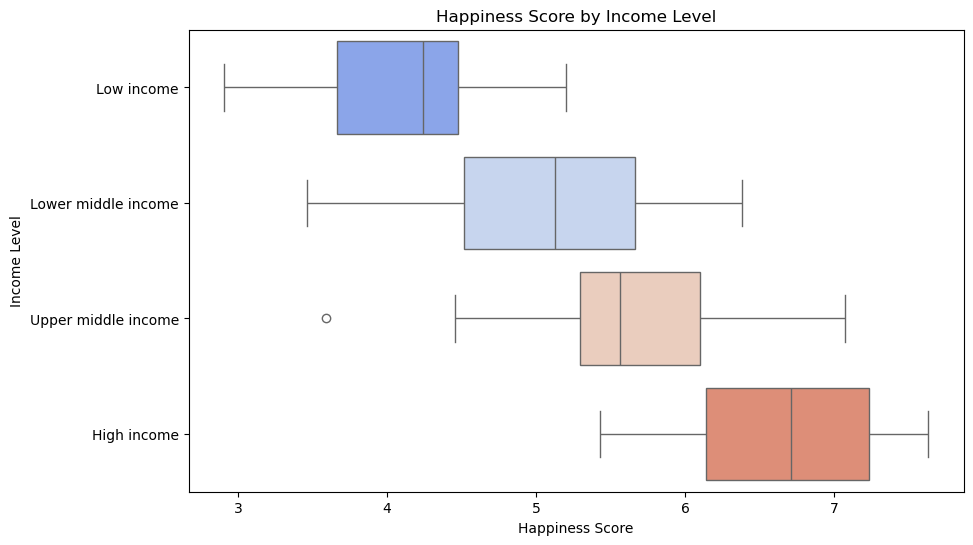

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25036\2349974081.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=color_palette)


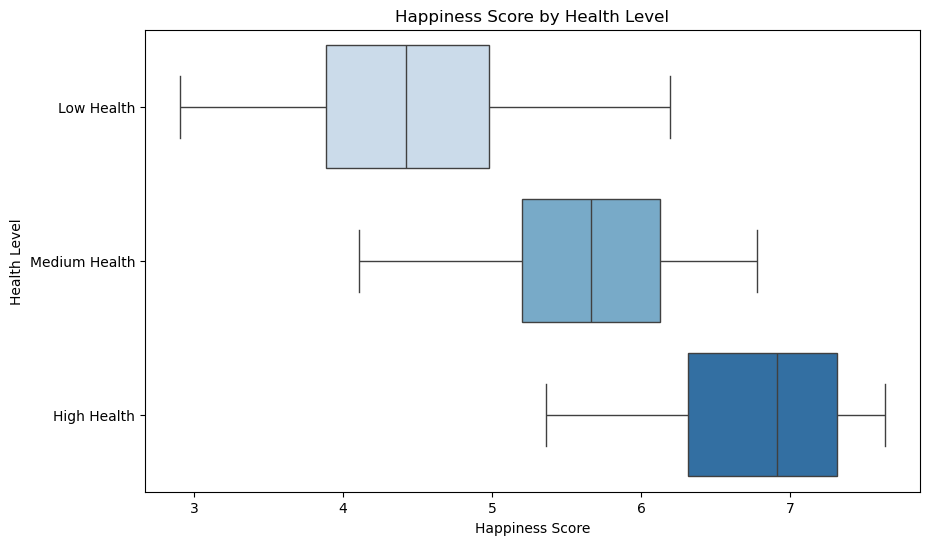

In [14]:
df['Income Level'] = pd.qcut(df['GDP per capita'], q=4, labels=['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
df['Health Level'] = pd.cut(
    df['Healthy life expectancy'],
    bins=[0, 0.6, 0.8, 1.0],
    labels=['Low Health', 'Medium Health', 'High Health']
)

def create_boxplot(df, x, y, title, xlabel, ylabel, color_palette):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=x, y=y, palette=color_palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

create_boxplot(df, x='Score', y='Income Level',
               title='Happiness Score by Income Level',
               xlabel='Happiness Score', ylabel='Income Level',
               color_palette='coolwarm')

create_boxplot(df, x='Score', y='Health Level',
               title='Happiness Score by Health Level',
               xlabel='Happiness Score', ylabel='Health Level',
               color_palette='Blues')

### Null Model (GLM)

In [15]:
formula = 'Score ~ 1'
model = smf.glm(formula, df, family = sm.families.Poisson())
result = model.fit()
print(result.summary())
predictions = result.predict()
print("AIC", result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Score   No. Observations:                  156
Model:                            GLM   Df Residuals:                      155
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -293.67
Date:                Mon, 16 Dec 2024   Deviance:                       36.719
Time:                        23:11:50   Pearson chi2:                     36.1
No. Iterations:                     4   Pseudo R-squ. (CS):          7.772e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6819      0.035     48.708      0.0

### AIC Minimization

In [16]:
target = 'Score'
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

def calculate_aic(model):
    return model.aic
def find_simplest_model(df, target, features):
    X = df[features]
    y = df[target]
    
    best_aic = float('inf')
    best_model = None
    best_features = None

    for k in range(1, len(features) + 1):
        for subset in combinations(features, k):
            X_subset = X[list(subset)]
            X_subset = sm.add_constant(X_subset)  # Add intercept
            
            model = sm.OLS(y, X_subset).fit()
            aic = calculate_aic(model)
            
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_features = subset
    
    return best_model, best_features, best_aic

best_model, best_features, best_aic = find_simplest_model(df, target, features)
print(f"Best Features: {best_features}")
print(f"Best AIC: {best_aic}")
print(f"Model Summary:\n{best_model.summary()}")

Best Features: ('GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption')
Best AIC: 247.3124443094954
Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.25e-48
Time:                        23:12:18   Log-Likelihood:                -117.66
No. Observations:                 156   AIC:                             247.3
Df Residuals:                     150   BIC:                             265.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           

### Variance Inflation Factor (VIF)

In [17]:
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

X = df[features]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["Feature"] != "const"]
print(vif_data)

                        Feature       VIF
1                GDP per capita  3.862909
2                Social support  2.110644
3       Healthy life expectancy  3.759449
4  Freedom to make life choices  1.515044
5                    Generosity  1.224693
6     Perceptions of corruption  1.472386


### Mixed-effects Model

In [18]:
# Define the formula for the mixed-effects model
# Fixed effects: 'GDP per capita', 'Social support', 'Healthy life expectancy', etc.
# Random effects: 'Country or region'
formula = "Score ~ Q('GDP per capita') + Q('Social support') + Q('Healthy life expectancy') + \
           Q('Freedom to make life choices') + Q('Generosity') + Q('Perceptions of corruption')"

# Random effects: Country or region
mixed_model = smf.mixedlm(formula, df, groups=df["Country or region"])
mixed_model_fit = mixed_model.fit()

print("Mixed-Effects Model Summary:")
print(mixed_model_fit.summary())
print(f"AIC: {mixed_model_fit.aic}")

Mixed-Effects Model Summary:
                  Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       Score    
No. Observations:        156           Method:                   REML     
No. Groups:              156           Scale:                    0.1372   
Min. group size:         1             Log-Likelihood:           -121.4324
Max. group size:         1             Converged:                Yes      
Mean group size:         1.0                                              
--------------------------------------------------------------------------
                                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                         1.884    0.194 9.693 0.000  1.503  2.265
Q('GDP per capita')               1.082    0.211 5.127 0.000  0.668  1.495
Q('Social support')               1.017    0.202 5.032 0.000  0.621  1.414
Q('Healthy life

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


***GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices all have statistically significant positive effects on happiness scores.***

***Generosity and Perceptions of corruption do not show significant relationships with happiness scores, indicating these variables might not be important in this model.***

### Residuals

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


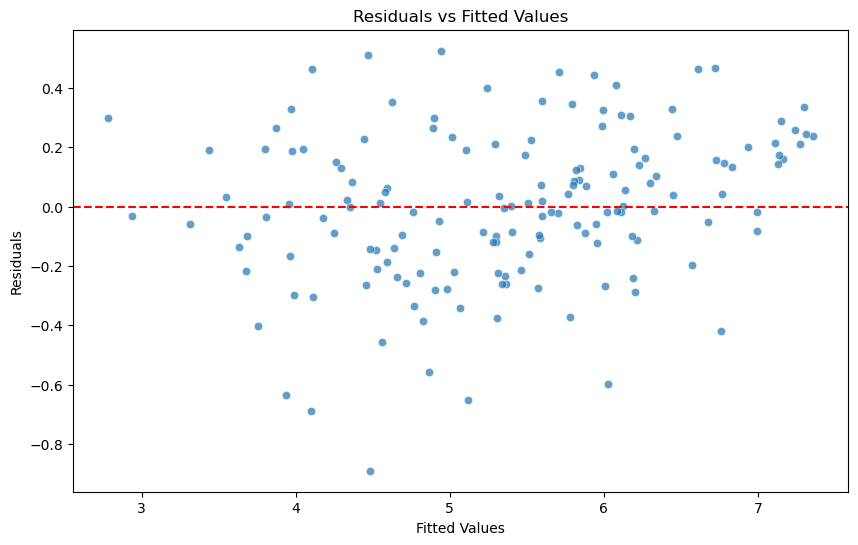

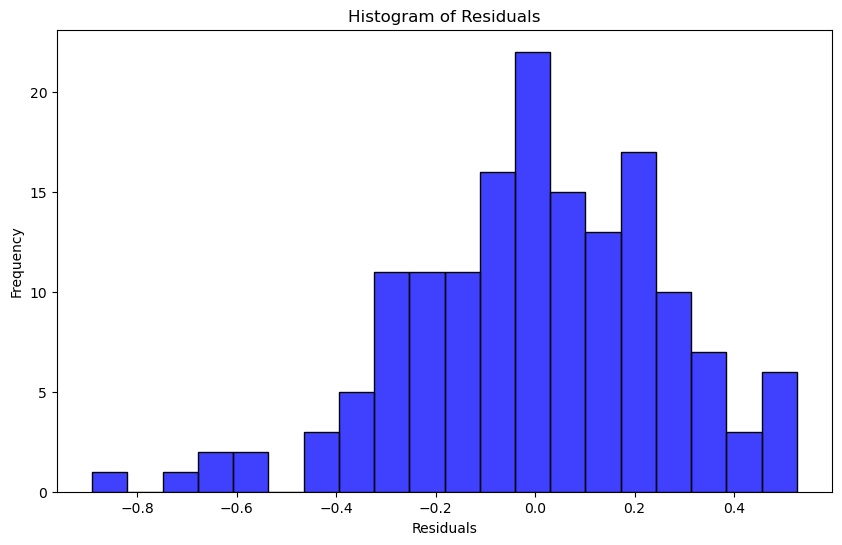

<Figure size 800x800 with 0 Axes>

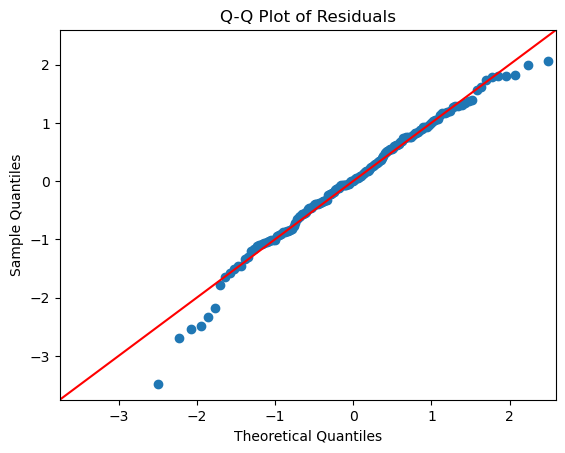

In [19]:
formula = "Score ~ Q('GDP per capita') + Q('Social support') + Q('Healthy life expectancy') + \
           Q('Freedom to make life choices') + Q('Generosity') + Q('Perceptions of corruption')"

# Fit the mixed-effects model with 'Region' as the grouping variable
mixed_model = smf.mixedlm(formula, df, groups=df["Country or region"])
mixed_model_fit = mixed_model.fit()

# Get the residuals (difference between observed and predicted values)
df['Residuals'] = mixed_model_fit.resid

# Plot 1: Scatter Plot of Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mixed_model_fit.fittedvalues, y=df['Residuals'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(df['Residuals'], kde=False, bins=20, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Q-Q Plot of Residuals (Check for Normality)
import statsmodels.api as sm
plt.figure(figsize=(8, 8))
sm.qqplot(df['Residuals'], line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Conclusion

#### Parsimonious Model

**Criteria for the most parsimonious model:**
* AIC: Lower AIC means a better trade-off between goodness of fit and model complexity.
* Feature Count: The simplified OLS model used fewer predictors while retaining predictive accuracy.
* Other factors like error measures such as MSE, RMSE, and etc.
  dm

*The best AIC is achieved with this features:*
- Best Features: ('GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption')
- It suggests that Generosity could be omitted and in some cases even Perceptions of corruption could be also redundant!